### How can we calculate the importance of features?

walk you through various techniques for determining feature importance:

1. Tree-based Methods:
  * Random Forest feature importance
  * XGBoost/LightGBM feature importance
  * Decision tree feature importance

**These measure importance based on how much each feature reduces impurity across all trees**


2. Linear Model Coefficients:
  * Absolute values of standardized coefficients in linear regression
  * Logistic regression coefficients
  * Lasso/Ridge regression coefficients

**Note: Features should be standardized first**

3. Statistical Methods:
  * Correlation coefficients (Pearson, Spearman)
  * Chi-square tests for categorical features
  * ANOVA F-values
  * Mutual Information

4. Permutation Importance:
  * Randomly shuffle values of each feature
  * Measure decrease in model performance
  * More reliable than built-in importances

5. SHAP (SHapley Additive exPlanations):
  * Game theory based approach
  * Provides both global and local feature importance
  * Accounts for feature interactions
  * More computationally intensive but very accurate

6. Recursive Feature Elimination (RFE):
  * Iteratively removes features
  * Ranks features based on model performance change
  * Can be used with any model that provides feature rankings

Here we are going to consider these six algorithms which are indeed popular methods for determining feature importance in machine learning models:  
1. Regression coefficients
2. Correlation with label
3. Feature Ablation
4. Permutation Importance
5. Tree based importance
6. SHapley Additive exPlanations (SHAP)  
7. XGBoost


In [7]:
import pandas as pd
import numpy as np
from numpy import sort
from numpy import cov
from numpy import transpose
import shap
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from xgboost import XGBClassifier


from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler


from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


from sklearn.datasets import load_diabetes
from sklearn.datasets import load_iris

In [ ]:
# from sklearn.datasets import load_boston # it shows erro


# ---------------------------------------------------------------------------

# ImportError                               Traceback (most recent call last)

# <ipython-input-40-bee2dd913ece> in <cell line: 1>()
# ----> 1 from sklearn.datasets import load_boston # it shows erro

# /usr/local/lib/python3.10/dist-packages/sklearn/datasets/__init__.py in __getattr__(name)
#     154             """
#     155         )
# --> 156         raise ImportError(msg)
#     157     try:
#     158         return globals()[name]

# ImportError:
# `load_boston` has been removed from scikit-learn since version 1.2.

# The Boston housing prices dataset has an ethical problem: as
# investigated in [1], the authors of this dataset engineered a
# non-invertible variable "B" assuming that racial self-segregation had a
# positive impact on house prices [2]. Furthermore the goal of the
# research that led to the creation of this dataset was to study the
# impact of air quality but it did not give adequate demonstration of the
# validity of this assumption.

# The scikit-learn maintainers therefore strongly discourage the use of
# this dataset unless the purpose of the code is to study and educate
# about ethical issues in data science and machine learning.

# In this special case, you can fetch the dataset from the original
# source::

#     import pandas as pd
#     import numpy as np

#     data_url = "http://lib.stat.cmu.edu/datasets/boston"
#     raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
#     data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
#     target = raw_df.values[1::2, 2]

# Alternative datasets include the California housing dataset and the
# Ames housing dataset. You can load the datasets as follows::

#     from sklearn.datasets import fetch_california_housing
#     housing = fetch_california_housing()

# for the California housing dataset and::

#     from sklearn.datasets import fetch_openml
#     housing = fetch_openml(name="house_prices", as_frame=True)

# for the Ames housing dataset.

# [1] M Carlisle.
# "Racist data destruction?"
# <https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

# [2] Harrison Jr, David, and Daniel L. Rubinfeld.
# "Hedonic housing prices and the demand for clean air."
# Journal of environmental economics and management 5.1 (1978): 81-102.
# <https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>



### 1. Regression coefficients

We will use Python to demonstrate how to calculate the regression coefficients and interpret them.

**Step 1:** Calculate Regression Coefficients
In a simple linear regression model, we want to fit a line of the form:
**Y=aX+b**

Where:
Y is the dependent variable (Exam Score).
X is the independent variable (Hours Studied).
a is the slope (regression coefficient).
b is the y-intercept.

We can calculate aa and bb using the following formulas:

a=n(∑xy)−(∑x)(∑y)/n(∑x2)−(∑x)2

b=(∑y)(∑x2)−(∑x)(∑xy)/n(∑x2)−(∑x)2

Where n is the number of observations.


**Step 2:** Implementing in Python
Let's perform these calculations using Python:

In [ ]:
# Create a DataFrame with our data
data = {
    'Hours_Studied': [1, 2, 3, 4, 5],
    'Exam_Score': [50, 55, 65, 70, 75]
}

df = pd.DataFrame(data)
df

,Hours_Studied,Exam_Score
0,1,50
1,2,55
2,3,65
3,4,70
4,5,75


In [ ]:
# Calculate necessary sums
n = len(df)
sum_x = df['Hours_Studied'].sum()
sum_y = df['Exam_Score'].sum()
sum_xy = (df['Hours_Studied'] * df['Exam_Score']).sum()
sum_x_squared = (df['Hours_Studied'] ** 2).sum()

In [ ]:
n, sum_x, sum_y, sum_xy, sum_x_squared

(5, 15, 315, 1010, 55)

In [ ]:
# Calculate coefficients
a = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x ** 2)
b = (sum_y * sum_x_squared - sum_x * sum_xy) / (n * sum_x_squared - sum_x ** 2)

print(f"Regression Coefficient (a): {a}")
print(f"Intercept (b): {b}")

Regression Coefficient (a): 6.5
Intercept (b): 43.5


This means our regression equation is:

**Y = 6.5X + 43.5**


Interpretation of Results

* **Slope (a=6.5):** This indicates that for each additional hour studied, the exam score increases by an average of 6.5 points.
* **Intercept (b=43.5):** This represents the expected exam score when no hours are studied.

In this context, it suggests that if a student studies for zero hours, their expected score would be 43.5 points.


### Visualization of Results
To visualize this regression line along with our data points, we can plot it using matplotlib:

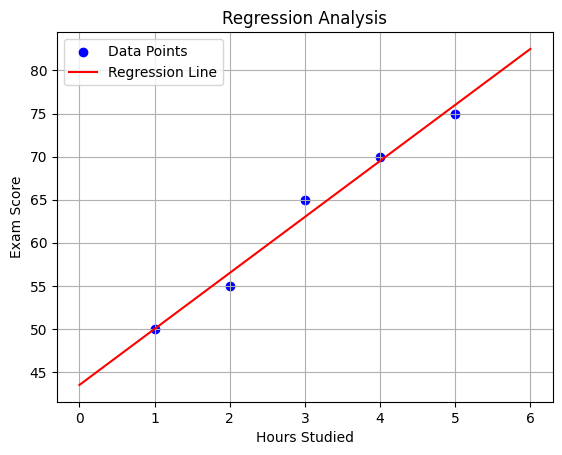

In [ ]:
# Plotting the data points
plt.scatter(df['Hours_Studied'], df['Exam_Score'], color='blue', label='Data Points')

# Plotting the regression line
x_values = np.linspace(0, 6, 100)
y_values = a * x_values + b
plt.plot(x_values, y_values, color='red', label='Regression Line')

# Adding labels and title
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Regression Analysis')
plt.legend()
plt.grid()
plt.show()

1. **The slope** indicates how much the dependent variable changes with each unit change in the independent variable
2. **The intercept** provides a baseline value when the independent variable is zero.

To illustrate the concept of using regression coefficients as a technique for determining feature importance, let's walk through an example using linear regression.

We'll analyze how the coefficients of a linear regression model can indicate the importance of different features in predicting a target variable.

In [ ]:
# Create a synthetic dataset
data = {
    'Size': [1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200],
    'Bedrooms': [3, 3, 4, 4, 5, 5, 6, 6],
    'Age': [10, 15, 10, 5, 2, 1, 3, 4],
    'Price': [300000, 320000, 350000, 370000, 400000, 420000, 450000, 470000]
}

df = pd.DataFrame(data)
df

,Size,Bedrooms,Age,Price
0,1500,3,10,300000
1,1600,3,15,320000
2,1700,4,10,350000
3,1800,4,5,370000
4,1900,5,2,400000
5,2000,5,1,420000
6,2100,6,3,450000
7,2200,6,4,470000


**Step 2: Train a Linear Regression Model**

We will use the LinearRegression model from scikit-learn to fit our data.

In [ ]:
# Split data into features and target variable
X = df[['Size', 'Bedrooms', 'Age']]
y = df['Price']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Step 3: Retrieve Regression Coefficients**

After fitting the model, we can retrieve the coefficients to determine feature importance.

In [ ]:
# Get the coefficients
coefficients = model.coef_
intercept = model.intercept_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
importance_df['Absolute Coefficient'] = importance_df['Coefficient'].abs()
importance_df = importance_df.sort_values(by='Absolute Coefficient', ascending=False)

In [ ]:
print(importance_df)

    Feature  Coefficient  Absolute Coefficient
1  Bedrooms      10000.0               10000.0
0      Size        200.0                 200.0
2       Age          0.0                   0.0


**Step 4: Interpret the Results**

Size (Coefficient: +200):
* For each additional square foot of size in the house, the price increases by $200. This indicates that size is a significant positive contributor to house price.

Bedrooms (if the Coefficient: -10000):
* The coefficient for bedrooms is negative;
  * however, this does not mean that having more bedrooms decreases the price.
  * It suggests that when controlling for size and age (i.e., holding them constant), increasing the number of bedrooms has a complex relationship with price.
  * This could indicate that larger homes (more size) are typically associated with fewer bedrooms or that smaller homes with more bedrooms may not be valued as highly.

Age (if the Coefficient: -5000):
* For each additional year of age of the house, the price decreases by $5000, indicating that older houses tend to be less valuable than newer ones. However,here Age has no effect on the predicted outcome.

Most Important Feature: Bedrooms (Feature 1)

  * Largest absolute coefficient indicates highest importance Largest absolute coefficient indicates highest importance.


Utilize the **coefficients of the linear models** to **capture the value each feature** adds to the prediction in **diabetes dataset**

**The absolute values of the coefficients** generated by the linear model for each feature **indicate the importance of the corresponding features**.

**Larger absolute values suggest a more substantial influence.**

In [ ]:
diabetes = load_diabetes()

In [ ]:
diabetes.feature_names


['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
# diabetes.target
diabetes.data.shape

# It contains 442 samples (rows) and 10 features (columns).

(442, 10)

It contains 442 samples (rows) and 10 features (columns).

each sample has 10 features. diabets.data[0] is the first sample and diabets.data[441] is the last sample

Sample interpretation:
* Each value represents a feature measurement for a single patient.
    * The features are:
        0. Age
        1. Sex
        2. Body mass index (BMI)
        3. Average blood pressure
        4. S1 Six blood serum measurements
        5. S2
        6. S3
        7. S4
        8. S5
        9. S6

Feature values:
1. These are standardized features, meaning they've been normalized to have zero mean and unit variance.
2. Negative values indicate measurements below the mean, positive values above the mean.

In [ ]:
len(diabetes.data)

442

In [ ]:
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [ ]:
diabetes.data[1] # second sample
# The output will be a numpy array with 10 elements

array([-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
       -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405])

1. each representing a feature for this specific patient.

2. -0.04464164 is the feature of Sex which is negative. So this sample is female

3. The second value (-0.04464164) represents the standardized sex feature.

4. A negative value suggests this patient is likely female (assuming male=1, female=-1).


In [ ]:
diabetes.data[2]
# diabetes.data[2], which represents the third sample (index 2) in the Diabetes dataset

array([ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
       -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034])

* The second value (0.05068012) represents the standardized sex feature.
* A positive value suggests this patient is likely male (assuming male=1, female=-1).


In [ ]:
diabetes.target[1]

75.0

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
  diabetes.data, diabetes.target, random_state=0)

In [ ]:
model = Ridge(alpha=1e-2).fit(X_train, y_train)

1. **Ridge regression** is a type of linear regression that includes a regularization term.
2. Also, Ridge regression, also known as Tikhonov regularization, is a variation of linear regression that adds a penalty term to the loss function to prevent overfitting.
3. This regularization helps **to prevent overfitting**, especially when dealing with multicollinearity (when independent variables are highly correlated).
4. The regularization term penalizes large coefficients, which can stabilize the estimates and improve the model's generalization to new data.

### Key Differences Between Linear Regression and Ridge Regression
1. Regularization:
  * Linear Regression: This method seeks to minimize the sum of squared residuals (the difference between predicted and actual values) without any penalty on the size of the coefficients. This can lead to overfitting, especially in cases with multicollinearity (when independent variables are highly correlated).
  * Ridge Regression: Ridge regression adds an L2 penalty to the loss function. The objective is to minimize the sum of squared residuals plus a penalty proportional to the square of the magnitude of coefficients. This penalty discourages large coefficients, helping to reduce overfitting and improve model generalization.


In [ ]:
len(model.coef_)

10

In [ ]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
# Fetch the importances from model.coef_
for i in range(len(model.coef_)):
  print(f"{diabetes.feature_names[i]:<8}"
  f"{abs(model.coef_[i]):.3f}")

age     39.098
sex     203.432
bmi     592.261
bp      297.251
s1      252.391
s2      20.879
s3      145.206
s4      97.034
s5      580.055
s6      32.946


In [ ]:
# Step 4: Fetch the importances from model.coef_
feature_importances = abs(model.coef_)
features = diabetes.feature_names

In [ ]:
# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': features,
                              'Importance': feature_importances})

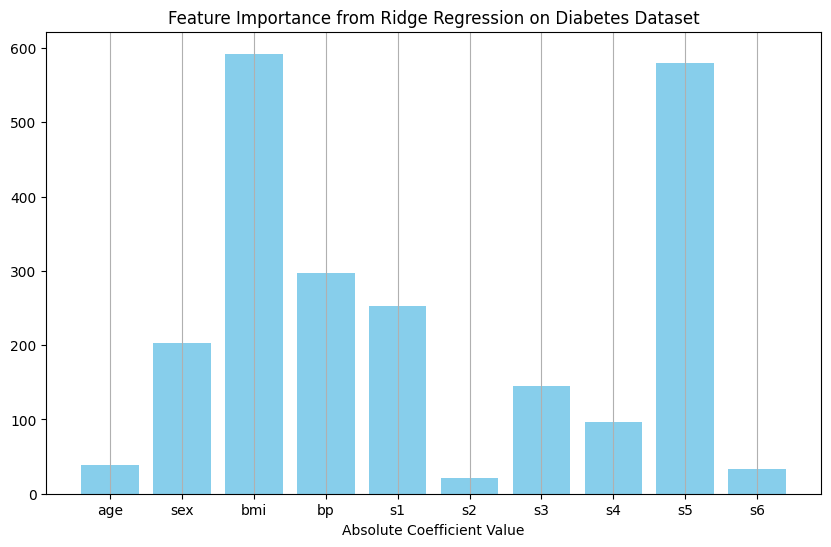

In [ ]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance from Ridge Regression on Diabetes Dataset')
plt.grid(axis='x')
plt.show()

### 2. Correlation with label

1. The most straightforward way to evaluate the significance of a feature is its correlation with the target variable.
2. **The higher the absolute magnitude (The absolute value) of the correlation, the more important that feature is.
3. There are multiple ways to calculate the correlation. The formula and code we have covered in our examples are based on **Pearson correlation.**

4. Evaluating feature significance:
  * The simplest method to assess how important a feature is for predicting the target variable is to measure its correlation with that target.
  * Correlation indicates how strongly two variables tend to move together.

5. Correlation magnitude:
    * The absolute value (magnitude) of the correlation coefficient determines importance.
    * Higher absolute values mean stronger relationships and thus greater importance.

6. Types of correlation:
    * There are several methods to calculate correlation, but the text specifically mentions Pearson correlation.
    * Other common types include Spearman rank correlation and Kendall rank correlation.

7. Pearson correlation:
    * This is the most commonly used correlation measure for continuous variables.
    * It quantifies the linear relationship between two variables.
    * The formula typically used is:
    r = Σ[(xi - μx)(yi - μy)] / (√Σ(xi - μx)² * √Σ(yi - μy)²)
    * Where xi and yi are individual data points, μx and μy are means, and Σ denotes summation.

8. Limitations:

While correlation is simple and intuitive, it has limitations:
1. It only captures linear relationships.
2. It doesn't account for non-linear effects or interactions between features.
3. High correlation doesn't necessarily imply causation.

9. Practical application:
    * In feature importance analysis, correlation is often used as a quick initial screening tool.
    * Features with high absolute correlations are typically considered more important candidates for inclusion in models.

10. Implementation:
    * Many statistical libraries provide built-in functions for calculating Pearson correlation.
    * For example, in Python's pandas library, you can use the **corr() function** to compute pairwise correlations.

**Formulas for Covariance (Population and Sample)**

Sample Covariance Formula:
* Cov(X,Y) = sum[(xi - mean(X)) * (yi - mean(Y))] * 1 / n-1

Population Covariance Formula:
* Cov(X,Y) = sum[(x - mean(X)) * (y - mean(Y))] * 1 / n

  * xi = data value of x
  * yi = data value of y
  * x̄ = mean of x
  * ȳ = mean of y
  * N = number of data values.

Pearson correlation coefficient:
ρ = cov(X,Y) / (σ_x * σ_y)

Where σ_x and σ_y are standard deviations of X and Y.

### IRIS Dataset

1. This code calculates the **absolute correlations between all features and the target variable** in the Iris dataset.
2. Then we sort them from highest to lowest.
3. **Features with higher absolute correlations are generally considered more important** according to this measure.

In [ ]:
# Load iris dataset
X, y = load_iris(return_X_y=True)

In [ ]:
# Create DataFrame
df = pd.DataFrame(X, columns=load_iris().feature_names)
df['target'] = y

In [ ]:
X, y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [ ]:
len(X),len(y)

(150, 150)

In [ ]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [ ]:
df.columns.values

array(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'], dtype=object)

In [ ]:
# Calculate correlations with target
correlations = df.corr()['target'].abs().sort_values(ascending=False)

print(correlations)

# .abs(): This method takes the absolute value of the correlation coefficients. This is useful because we are interested in the strength of the relationship regardless of direction (positive or negative).
# For example, both a correlation of 0.8 and -0.8 indicate a strong relationship.

target               1.000000
petal width (cm)     0.956547
petal length (cm)    0.949035
sepal length (cm)    0.782561
sepal width (cm)     0.426658
Name: target, dtype: float64


This code calculates the absolute correlations between all features and the target variable in the Iris dataset, sorting them from highest to lowest.

Features with higher absolute correlations are generally considered more important according to this measure.

**Interpretation of Output:**

1. target:
    * The correlation of target with itself is always 1.000000, indicating a perfect correlation (as expected).
2. petal width (cm):
    * The absolute correlation with target is 0.956547. This indicates a very strong positive relationship between petal width and the target variable, suggesting that as petal width increases, the target variable also tends to increase significantly.
3. petal length (cm):
    * The absolute correlation is 0.949035, which also indicates a strong positive relationship with the target variable, similar to petal width.
4. sepal length (cm):
    * The absolute correlation is 0.782561, indicating a moderate to strong positive relationship with the target variable.
5. sepal width (cm):
    * The absolute correlation is 0.426658, which suggests a weak to moderate positive relationship with the target variable compared to the other features.

**This analysis can guide feature selection in modeling efforts, helping you focus on features that have stronger relationships with your outcome of interest.**

Based on the correlation analysis results:
* it would be reasonable to prioritize the selection of features that show **a strong correlation with the target variable** for your modeling efforts.

Here’s a more detailed explanation of why you might choose to focus on petal width and petal length, and consider dropping or minimizing the use of other features:

Reasons for Selecting Features Based on Correlation
1. Strong Correlation:
    * Petal Width (0.956547) and Petal Length (0.949035) have very high absolute correlation values with the target variable, indicating that they are likely to be significant predictors.
    * This suggests that changes in these features are strongly associated with changes in the target variable.
2. Predictive Power:
    * Features that exhibit strong correlations with the target variable generally provide more predictive power in regression models or classifiers.
    * By including these features, you can improve the model's accuracy and performance.
3. Reducing Dimensionality:
    * By focusing on features with high correlations and potentially dropping those with weak correlations (like sepal width at 0.426658), you can reduce the dimensionality of your dataset.
  
**This simplification can lead to:**
* Faster model training times.
* Reduced risk of overfitting, especially if your dataset is not very large.
4. Interpretability:
    * Fewer features make the model easier to interpret. When you have a model with only a few important features, it becomes clearer how each feature contributes to predictions.

**Considerations Before Dropping Features**
While it seems beneficial to focus on petal width and petal length, here are some considerations before completely dropping other features:
1. Multicollinearity:
    * If sepal length or sepal width are correlated with petal width or petal length, they may still provide valuable information when included together.
    * Check for multicollinearity using Variance Inflation Factor (VIF) or similar metrics.
2. Model Type:
    * The impact of feature selection can vary depending on the type of model you are using.
    * Some models (like tree-based models) can handle irrelevant features better than others (like linear regression).
3. Interactions:
    * Sometimes, interactions between features can be important even if individual features do not show strong correlations with the target variable.
    * Consider whether interaction terms might add value.
4. Validation:
    * Always validate your feature selection approach by assessing model performance using cross-validation or a hold-out validation set.
    * This will help ensure that dropping certain features does not negatively impact predictive performance.
5. Domain Knowledge:
    * Use domain knowledge when making final decisions about feature selection. Sometimes, even weakly correlated features may have theoretical significance in your specific context.

**Conclusion**
* In summary, focusing on petal width and petal length as important features based on their strong correlation with the target variable is a sound strategy for feature selection.
* However, it's essential to consider the broader context, including multicollinearity, interactions, and validation results before making final decisions about dropping other features entirely.
* A balanced approach combining statistical analysis and domain knowledge will yield the best results in feature selection for your model.

### Back to the main dataset(diabetes)

Purpose:
1. The goal is to find which features are most strongly correlated with the target variable (diabetes progression).
2. This helps in understanding which factors most influence diabetes progression.



In [ ]:
for i in range(len(transpose(diabetes.data))):
  covariance = cov(transpose(diabetes.data)[i], diabetes.target)
  # Fetch the importances in covariance[0][1]
  print(f"{diabetes.feature_names[i]:<8}"
          f"{abs(covariance[0][1]):.3f}")

age     0.690
sex     0.158
bmi     2.153
bp      1.621
s1      0.778
s2      0.639
s3      1.449
s4      1.580
s5      2.077
s6      1.404


**Output interpretation:**

Strongest Features:
1. BMI (Body Mass Index): With a covariance of 2.153, BMI has the highest absolute value, suggesting it has a strong relationship with disease progression.
2. S5 (possibly serum triglycerides): With a covariance of 2.077, this feature is also very influential.
3. Blood Pressure (bp): With a covariance of 1.621, blood pressure is another significant feature.


**Meaning of the values:**
1. Positive values indicate a positive correlation (as feature increases, diabetes progresses).
2. The magnitude of the value shows the strength of the correlation.




In [ ]:
diabetes.target[1]

75.0

Interpretation of diabetes.target[1] = 75
1. Specific Patient's Progression Score: The value 75 indicates that for the second patient (index 1) in the dataset, their diabetes progression score is 75.
2. Quantitative Measure: This score is a numerical representation of how much the disease has progressed over the year following the baseline measurements. Higher scores generally indicate more significant disease progression.
3. Clinical Relevance: In practical applications, healthcare professionals might use these scores to assess risk levels and tailor treatment strategies for patients based on their predicted progression.
4. This means that each value in diabetes.target corresponds to the progression score of diabetes for each patient after one year.

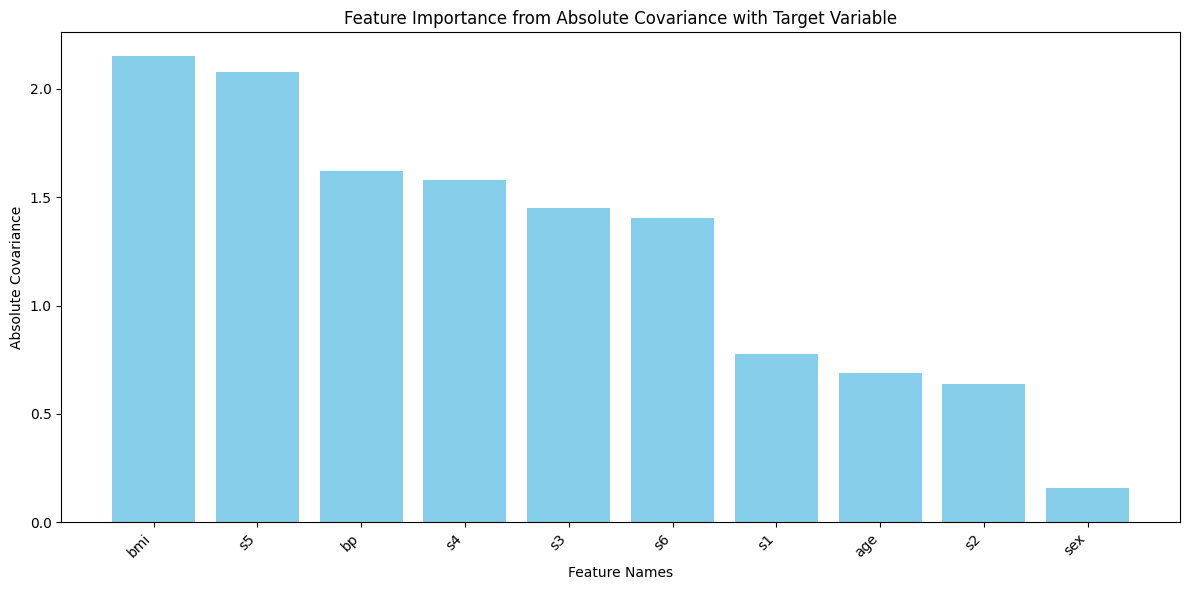

In [ ]:
# Get feature names
feature_names = diabetes.feature_names

# Calculate absolute covariance for each feature
absolute_covariances = [np.abs(np.cov(diabetes.data[:, i], diabetes.target)[0, 1])
                        for i in range(diabetes.data.shape[1])]

# Create a DataFrame for better visualization
covariance_df = pd.DataFrame({
    'Feature': feature_names,
    'Absolute Covariance': absolute_covariances
})

# Sort the DataFrame by absolute covariance in descending order
covariance_df = covariance_df.sort_values(by='Absolute Covariance', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(covariance_df['Feature'], covariance_df['Absolute Covariance'], color='skyblue')
plt.xlabel('Feature Names')
plt.ylabel('Absolute Covariance')
plt.title('Feature Importance from Absolute Covariance with Target Variable')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

 absolute_covariances = [np.abs(np.cov(diabetes.data[:, i], diabetes.target)[0, 1])...

is calculating the absolute covariance between each feature and the target variable. Here's a detailed explanation:
1. range(diabetes.data.shape[1]):
    * This generates indices for each feature in the dataset.
    * diabetes.data.shape[1] gives the number of features (columns).

2. np.cov(diabetes.data[:, i], diabetes.target):
      * diabetes.data[:, i]: Selects the i-th column of the feature matrix.
      * diabetes.target: The target variable array.
        np.cov() calculates the covariance between these two arrays.
3. [0, 1]:
    * Returns the element at row 0, column 1 of the covariance matrix.
    * This is the covariance between the feature and the target variable.


### 3. Feature Ablation

**Feature ablation:**
* refers to removing a set of features from the model.
* A simple way to determine the importance of a feature is to see the drop in the model’s performance (measured by target metrics such as auc-roc, auc-pr, precision, and recall) when the feature is removed.
* The feature whose removal leads to the most significant drop in target performance is the most important.
* Feature importance could be sorted by decreasingly sorting the increase in losses.

In [ ]:
def loss_calc(data):
  X_train, X_test, y_train, y_test = train_test_split(
    data, diabetes.target, test_size=0.33, random_state=0)
  model = Ridge(alpha=1e-2).fit(X_train, y_train)
  y_predict = model.predict(X_test)
  return np.sum(np.absolute(y_predict - y_test))

In [ ]:
all_loss = loss_calc(diabetes.data)

The below code is a key step in assessing feature importance based on the impact of each feature on model performance.


1. Outer Loop (for i in range(len(diabetes.feature_names))):
* This loop iterates over each feature in the diabetes dataset.
* The variable i represents the index of the feature currently being evaluated.

2. Inner Loop (for j in range(len(np.transpose(diabetes.data)))):
* This loop iterates over all features in the dataset again.
* The use of np.transpose(diabetes.data) is to access each feature as a separate array. Transposing the dataset means that rows become columns and vice versa, allowing us to easily iterate over individual features.


3. Conditional Check (if i != j):
* This condition checks if the current index j is not equal to i. If they are not equal, it means that we are looking at a different feature than the one currently being evaluated.
* If this condition is true, we append the feature corresponding to index j to the data list.


In [ ]:
for i in range(len(diabetes.feature_names)):
  data = []
  for j in range(len(np.transpose(diabetes.data))):
    if i != j:
      data.append(np.transpose(diabetes.data)[j])
  # Difference in loss determines the importance
  loss_feature = loss_calc(np.transpose(np.array(data)))
  print(f"{diabetes.feature_names[i]:<8}"
          f"{all_loss - loss_feature:.3f}")

age     6.383
sex     -176.386
bmi     -244.177
bp      -233.747
s1      -18.923
s2      -3.561
s3      24.997
s4      -8.140
s5      -39.547
s6      -27.653


the ablation study shows that:
1. Removing age (6.383) and s3 (24.997) features leads to decreased losses, implying better performance without these features.
2. But it is also important to note that all the features carry a lower but significant importance per other algorithms, indicating all the features are important for performance.

### Simple example for better undrestanding of Feature ablation

1. We created a toy dataset with 3 features and 100 samples

In [ ]:
# Set seed for reproducibility
np.random.seed(42)

# Create toy dataset
n_samples = 100
X = np.random.randn(n_samples, 3)
y = 2 + 3*X[:, 0] + 4*X[:, 1] + 5*X[:, 2] + np.random.randn(n_samples)

In [ ]:
X.shape, y.shape

((100, 3), (100,))

2. We defined a function calculate_mse to train a linear regression model.

In [ ]:
# Function to calculate MSE
def calculate_mse(X, y):
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)
    return mean_squared_error(y, y_pred)

3. Compute the Mean Squared Error for Baseline

In [ ]:
# Baseline MSE with all features
full_X = X.copy()
baseline_mse = calculate_mse(full_X, y)
print(f"Baseline MSE (all features): {baseline_mse:.4f}")

Baseline MSE (all features): 0.7568


4. We calculated the baseline MSE using all features.
5. We performed feature ablation by systematically removing each feature and recalculating the MSE.



In [ ]:
# Perform feature ablation
for i in range(3):
  # Create a copy of X and remove the current feature
  ablated_X = np.delete(full_X, i, axis=1)

  # Calculate MSE without this feature
  mse_without_feature = calculate_mse(ablated_X, y)

In [ ]:
# Calculate the increase in MSE due to removing this feature
mse_increase = mse_without_feature - baseline_mse

6. We measured the impact of removing each feature by comparing the MSE with and without that feature.

In [ ]:
print(f"Feature {i+1} removed:")
print(f"MSE: {mse_without_feature:.4f}, Increase: {mse_increase:.4f}")

Feature 3 removed:
MSE: 29.1842, Increase: 28.4275


1. There are several pros to this method.
2. This method works very well for all types of features and models.
3. You don’t have to worry about feature overlap.
4. It is easy to understand and explain as well.
5. However, a major con of this approach is its complexity.
6. You will need to run training for each feature ablation, and if you have many features, this would mean `significant resource and time consumption`.

### 4. Permutation Importance

* This technique involves randomly shuffling the values of a feature and measuring the resulting decrease in model performance.
* The more significant the drop in performance, the more critical the feature.
* This approach is model-agnostic and can be used with various machine-learning algorithms.
* Here is an example of implementing ridge regression on the diabetes prediction task with different numerical features.
Permutation importance is used to calculate the importance of the different features.


**Permutation Importance:**
* it is a technique used to assess the importance of different features in a predictive model.
* It provides insights into how much each feature contributes to the model's predictions by evaluating the change in model performance when the values of a feature are randomly shuffled.

***************************************************

**Key Concepts of Permutation Importance**
1. **Model Agnostic:**
  * Definition: Permutation importance is a model-agnostic interpretability method, meaning it can be applied to any machine learning model, whether it’s a simple linear regression or complex models like neural networks.
  * Use Cases: This makes it versatile for understanding feature contributions across various algorithms.
  1.2 Mechanism:
      1. **Training the Model:** First, you train a machine learning model using the original dataset with all features intact.
      2. **Evaluating Performance:** You measure the model's performance using an appropriate metric (e.g., accuracy for classification, mean squared error for regression).
      3. **Permuting Feature Values:** For each feature, you randomly shuffle its values while keeping other features unchanged. This breaks the relationship between that feature and the target variable.
      4. **Reevaluating Performance:** You then evaluate the model's performance again using the dataset with the permuted feature.
      5. **Calculating Importance:** The difference in performance (e.g., drop in accuracy or increase in error) indicates the importance of that feature. A significant drop suggests that the feature is important for making predictions.
2. **Importance Calculation Steps:**
      * The procedure involves repeating the permutation and evaluation for each feature in the dataset, resulting in an importance score for each feature based on how much its shuffling affects model performance.
3. **Randomness and Variability:**
      * Since permutation involves random shuffling, different runs can yield slightly different importance scores. To address this variability, it’s often recommended to average results over multiple shuffles.
4. **Metric Selection:**
      * The choice of performance metric is crucial and can vary based on whether you are dealing with classification or regression tasks. Common metrics include accuracy, precision, recall for classification, and mean squared error or R-squared for regression.
5. **Interpretation of Results:**
      * Features that result in a large drop in model performance when permuted are considered important, while those that show little to no change may be less significant.
      * Negative values for permutation importance can indicate that predictions on shuffled data are more accurate than on real data, suggesting that those features do not contribute meaningfully to predictions.


**Example Use Case:**

Imagine you have trained a model to predict flight delays based on various features such as weather conditions, departure times, and aircraft types. Using permutation importance:

  1. You would first train your model and evaluate its accuracy.
  2. Then you shuffle the values of one feature (e.g., weather conditions) and measure how much accuracy drops.
  3. If accuracy drops significantly, it indicates that weather conditions are an important factor in predicting flight delays.

**Conclusion**
* Permutation Importance is a powerful tool for interpreting machine learning models by quantifying how much each feature contributes to predictions.
* Its model-agnostic nature allows it to be applied across various algorithms, making it a valuable technique for data scientists looking to understand their models better and improve their predictive capabilities.

I'll provide a simple example demonstrating Permutation Importance for a **flight delay prediction model** using Python.

This example will focus on weather conditions as one of the features.
Step-by-step thought process:
1. Create a toy dataset with relevant features for flight delay prediction.
2. Train a model (we'll use Random Forest for its interpretability).
3. Evaluate the initial model performance.
4. Apply permutation importance by shuffling features one at a time.
5. Measure the impact of each shuffled feature on model performance.

**Key points to consider:**
* We'll use scikit-learn for the Random Forest model and metrics.
* We'll focus on Mean Absolute Error (MAE) as our evaluation metric.
* We'll shuffle features individually and measure the change in MAE.


In [ ]:
# Set seed for reproducibility
np.random.seed(42)

# Create toy dataset
n_flights = 1000
data = {
    'weather_conditions': np.random.choice(['Good', 'Fair', 'Poor'], n_flights),
    'departure_time': np.random.randint(6, 24, n_flights),# Hours of day
    'aircraft_type': np.random.choice(['Small', 'Medium', 'Large'], n_flights),
    'flight_delay': np.abs(np.random.normal(0, 20, n_flights))# Simulated delay in minutes
}

In [ ]:
df = pd.DataFrame(data)
df

,weather_conditions,departure_time,aircraft_type,flight_delay
0,Poor,8,Large,1.716808
1,Good,13,Large,11.600560
2,Poor,10,Large,16.599243
3,Poor,9,Small,11.056701
4,Good,11,Medium,13.112208
...,...,...,...,...
995,Fair,12,Medium,0.029237
996,Fair,17,Small,20.260590
997,Poor,15,Small,29.840357
998,Poor,12,Small,4.956660


In [ ]:
# Convert categorical variables to numeric
df['weather_conditions'] = df['weather_conditions'].map({'Good': 0, 'Fair': 1, 'Poor': 2})
df['aircraft_type'] = df['aircraft_type'].map({'Small': 0, 'Medium': 1, 'Large': 2})

In [ ]:
# Split data into features and target
X = df[['weather_conditions', 'departure_time', 'aircraft_type']]
y = df['flight_delay']

In [ ]:
X.shape, y.shape

((1000, 3), (1000,))

In [ ]:
# Split dataset into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train, y_train

(     weather_conditions  departure_time  aircraft_type
 29                    2              16              1
 535                   1              13              1
 695                   1               6              1
 557                   0              16              0
 836                   2              17              0
 ..                  ...             ...            ...
 106                   0              12              1
 270                   0              11              2
 860                   1              12              2
 435                   1              21              2
 102                   2              15              0
 
 [800 rows x 3 columns],
 29     22.181081
 535    27.936964
 695     1.096173
 557    19.202770
 836    14.090696
          ...    
 106    20.958841
 270    15.339732
 860    22.983098
 435     2.252477
 102     3.722447
 Name: flight_delay, Length: 800, dtype: float64)

In [ ]:
X_train.shape, X_test.shape

((800, 3), (200, 3))

In [ ]:
# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
def calculate_mae(X, y):
    y_pred = model.predict(X)
    return mean_absolute_error(y, y_pred)


In [ ]:
# Baseline MAE
baseline_mae = calculate_mae(X_test, y_test)
print(f"Baseline MAE: {baseline_mae:.2f}")

Baseline MAE: 10.24


In [ ]:
# Perform permutation importance
features = ['weather_conditions', 'departure_time', 'aircraft_type']
for feature in features:
    # Shuffle the values of the current feature
    shuffled_X = X_test.copy()
    shuffled_X[feature] = shuffled_X[feature].sample(frac=1).values

    # Calculate MAE after shuffling
    shuffled_mae = calculate_mae(shuffled_X, y_test)

    # Calculate increase in MAE
    mae_increase = shuffled_mae - baseline_mae

    print(f"\nShuffled Feature: {feature}")
    print(f"MAE: {shuffled_mae:.2f}, Increase: {mae_increase:.2f}")


Shuffled Feature: weather_conditions
MAE: 10.45, Increase: 0.21

Shuffled Feature: departure_time
MAE: 10.55, Increase: 0.31

Shuffled Feature: aircraft_type
MAE: 10.51, Increase: 0.26


### Features with larger increases in MAE when shuffled are generally more important for the model's predictions.

Conclusion:

**The Departure Time feature has the most effect on the model's performance.**

Here's why:
1. Largest Increase: Departure Time shows the largest increase in MAE (0.31) compared to shuffling any other feature.
2. Relative Impact: The increase in MAE for Departure Time is approximately 50% higher than Weather Conditions and 18% higher than Aircraft Type.
3. Consistency: This result suggests that the model relies most heavily on Departure Time when making predictions about flight delays.

**Interpretation:**

* These results indicate that the departure time of flights is the most important factor among the three considered features for predicting flight delays.
* This makes intuitive sense, as departure times can affect traffic patterns, air traffic control procedures, and potentially weather conditions at the time of departure.

Weather Conditions and Aircraft Type also show some importance, but to a lesser extent. Weather Conditions might be less predictive because the relationship between weather and delays can be complex and vary greatly depending on the specific conditions. Aircraft Type shows some impact, possibly due to differences in maneuverability or typical flight patterns associated with different aircraft sizes.

It's important to note that while Departure Time appears most influential among these three factors, real-world flight delay prediction would likely involve many more variables, including historical data, air traffic control policies, and more detailed weather forecasts.

Summary of the code and best practices:
1. We created a toy dataset simulating flight delay prediction with relevant features.
2. We trained a Random Forest model on the training data.
3. We defined a function calculate_mae to compute Mean Absolute Error.
4. We calculated the baseline MAE using all features.
5. We performed permutation importance by shuffling each feature individually and measuring the impact on MAE.


### Tree Based Importance

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
diabetes.data, diabetes.target, random_state=0)

In [ ]:
# Fit a Random Forest Model
forest = RandomForestRegressor(random_state=0)
forest.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
# Fetch the importances
importances = forest.feature_importances_


for i in range(len(importances)):
  print(f"{diabetes.feature_names[i]:<8}"
          f"{importances[i]:.3f}")

age     0.050
sex     0.009
bmi     0.359
bp      0.093
s1      0.042
s2      0.053
s3      0.055
s4      0.027
s5      0.249
s6      0.064


1. The feature importance scores represent how much each feature contributes to the overall model performance. The scores are normalized to sum up to 1, so they can be interpreted as percentages.

2. BMI (Body Mass Index) is clearly the most important feature, accounting for 35.9% of the model's explanatory power.

3. BMI being the most important feature suggests that body mass index is strongly correlated with the target variable (likely diabetes progression or risk).


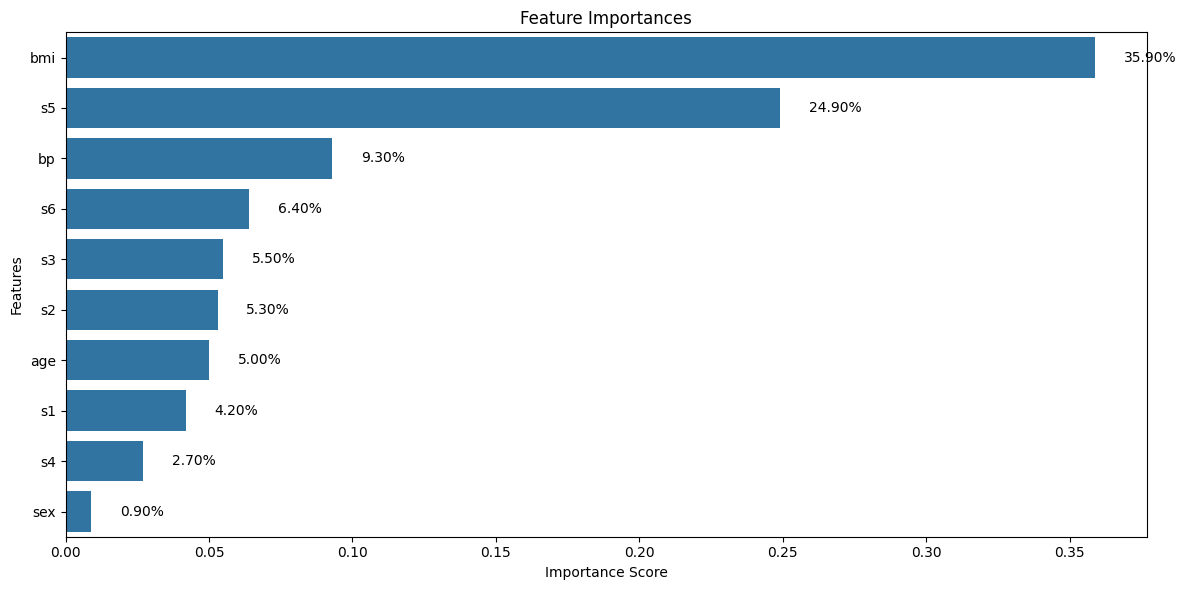

In [ ]:
# Feature importance data
features = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
importances = [0.050, 0.009, 0.359, 0.093, 0.042, 0.053, 0.055, 0.027, 0.249, 0.064]

# Sort features by importance
sorted_features = sorted(zip(features, importances), key=lambda x: x[1], reverse=True)

# Separate sorted features and importances
sorted_features, sorted_importances = zip(*sorted_features)

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_importances, y=sorted_features, orient='h')
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')

# Add numerical labels
for i, v in enumerate(sorted_importances):
    plt.text(v + 0.01, i, f'{v:.2%}', color='black', ha='left', va='center')

plt.tight_layout()
plt.show()


### SHAP (SHapley Additive exPlanations)

SHAP (SHapley Additive exPlanations) values are a way to explain the output of any machine learning model.

One of the most promising tools is SHAP values, which measure how much each feature (such as income, age, credit score, etc.) contributes to the model's prediction.

SHAP values can help you see which features are most important for the model and how they affect the outcome.

SHAP values show how each feature affects each final prediction, the significance of each feature compared to others, and the model's reliance on the interaction between features.

SHAP values are based on game theory and assign an importance value to each feature in a model.

Feature Impact:
* A positive SHAP value indicates that a feature pushes the prediction higher
* A negative SHAP value suggests it pulls the prediction lower.

This allows practitioners to see not just which features are important, but also how they influence predictions directionally

* Features with positive SHAP values positively impact the prediction,
* Features with negative values have a negative impact.
* The magnitude is a measure of how strong the effect is.


**SHAP values are model-agnostic**, meaning they can be used to interpret any machine learning model, including:
* Linear regression
* Decision trees
* Random forests
* Gradient boosting models
* Neural networks



### Explanation of the flowchart:
1. Prepare Data: Collect and preprocess your dataset.
2. Train Base Model: Train your primary machine learning model on the prepared data.
3. Create SHAP Model: Build a SHAP model that mimics the base model's behavior.
4. Calculate SHAP Values: Use the SHAP model to compute feature contributions for each sample.
5. Analyze Results: Visualize SHAP values using various plots (e.g., Summary Plot, Dependence Plots).
6. Identify Key Features: Determine which features significantly contribute to predictions.
7. Refine Model: Based on SHAP insights, consider refining the model if necessary.
8. Validate Interpretations: Ensure the SHAP explanations align with domain knowledge and expectations.


### First example of SHAP  on **diabetes dataset**

In [ ]:
shap.initjs()

The `as_frame=True` argument indicates that the dataset should be returned as a Pandas DataFrame instead of a NumPy array.

This makes it easier to manipulate and analyze the data using Pandas functionality.

## 1.	Prepare Data

In [ ]:
diabetes = load_diabetes(as_frame=True)
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
                                                  diabetes['data'].iloc[:, :10],
                                                     diabetes['target'], test_size=0.2, random_state=1)

In [ ]:
diabetes['data']

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [ ]:
diabetes['target']

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


### Recall:
1. The target values in the diabetes dataset represent a quantitative measure of disease progression based on clinical data collected from patients.
2. They are derived from various health metrics measured at baseline (Specifically, it is calculated using a specific formula based on the patient's health metrics at baseline (the time of measurement).) and reflect how much each patient's condition has changed over a year.

* 151.0: This value indicates that for the first patient, their diabetes progression score is 151 after one year.
* 75.0: For the second patient, a score of 75 suggests less progression compared to others.
* 220.0: A score of 220 indicates significant progression for that patient.


## 2.	Train Base Model

In [ ]:
model = RandomForestRegressor(random_state=42).fit(X_train, y_train)

## 3.	Create SHAP Model

In [ ]:
explainer = shap.Explainer(model)

## 4.	Calculate SHAP Values

What happens when you call explainer(X_test):
* explainer: This is typically an instance of a SHAP explainer class (like TreeExplainer or KernelExplainer).
* The explainer object uses its specific algorithm to calculate SHAP values for each sample in X_test.
* It computes how much each feature contributes to the model's prediction for each instance in X_test.


In [ ]:
shap_test = explainer(X_test)

In [ ]:
shap_test.shape

(89, 10)

In [ ]:
shap_test.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
shap_test.values[0]

array([ -0.31145661,   2.28376265, -29.73189576, -13.26032226,
        -2.88563981,  -0.09497915,  -8.99342853,  -1.79956002,
        33.53249156,  -2.13429785])

The array of SHAP values you provided represents **the contribution of each feature in your diabetes dataset to a specific prediction** made by your machine learning model.

The SHAP values correspond to these features in the same order as listed above.

### Contribution Analysis

**Negative Contributions:**
* age: −0.311 indicates that an increase in age slightly decreases the predicted outcome (e.g., likelihood of diabetes).
* bmi: −29.732 shows a strong negative impact, suggesting that higher BMI significantly decreases the predicted outcome.
* Other negative contributions include bp −13.260, s1 −2.886, s2 −0.095, s3 −8.993, and s4 −1.800. These features also negatively influence the prediction but to varying extents.
    
**Positive Contributions:**
* sex: 2.2842.284 indicates that being male (if coded as 1) positively influences the prediction.
* The feature s5 has a significant positive SHAP value of 33.53233.532, suggesting it has a major positive impact on increasing the predicted outcome.
* The feature s6 has a small negative contribution of −2.134.

**Summary**

In summary, the SHAP values indicate how much each feature contributes to the model's prediction for a specific instance:

**Features with positive SHAP values increase the predicted outcome**,
**while those with negative values decrease it.**

The magnitude of each value indicates the strength of its contribution; larger absolute values signify a greater influence on the prediction.



### 7.	Refine Model: Based on SHAP insights, consider refining the model if necessary.

In [ ]:
shap_df = pd.DataFrame(shap_test.values, columns=shap_test.feature_names,
  index=X_test.index)

In [ ]:
# Fetch the importances
shap_df = shap_df.apply(np.abs).mean().sort_values(ascending=False)
print(shap_df)

bmi    28.658587
s5     23.053918
bp      9.388872
s6      4.344819
age     4.074087
s3      3.931500
sex     2.962568
s4      2.514729
s1      1.614846
s2      1.614510
dtype: float64


### 5.	Analyze Results: Visualize SHAP values using various plots (e.g., Summary Plot, Dependence Plots).

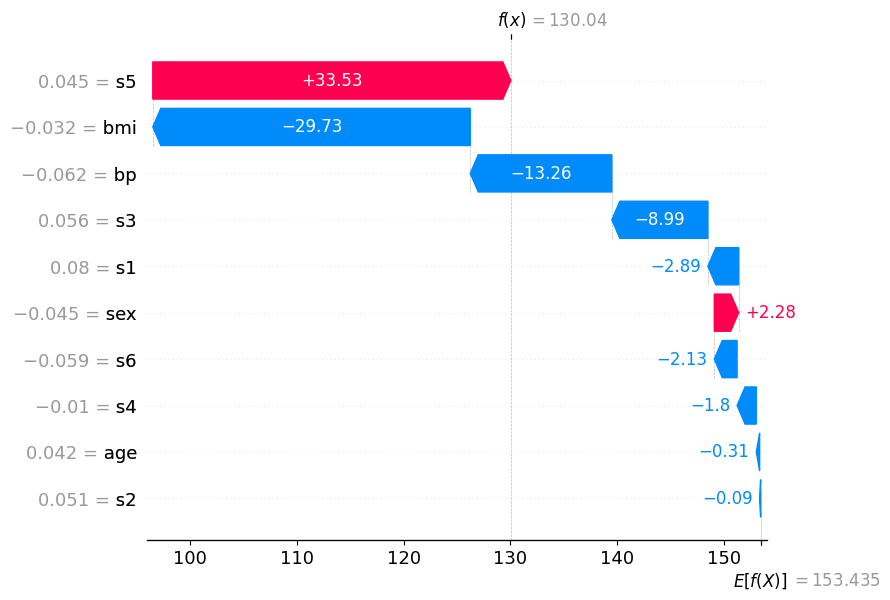

In [ ]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_test[0])

## Second Example of SHAP **Customer_Churn** :
Source of datasets:
* https://www.kaggle.com/datasets/royjafari/customer-churn
* https://www.datacamp.com/datalab/datasets/dataset-python-telecom-customer-churn
* https://www.datacamp.com/tutorial/introduction-to-shap-values-machine-learning-interpretability



In [ ]:
shap.initjs()

In [ ]:
customer = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Customer_Churn.xls')
customer.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,FN,FP,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,177.8760,69.7640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,41.4315,60.0000,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,1382.8680,203.6520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,216.0180,74.0020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,131.2245,64.5805,0


In [ ]:
customer.dtypes

,0
Call Failure,int64
Complains,int64
Subscription Length,int64
Charge Amount,int64
Seconds of Use,int64
Frequency of use,int64
Frequency of SMS,int64
Distinct Called Numbers,int64
Age Group,int64
Tariff Plan,int64


Model Training and Evaluation
1. Create X and y using a target column and split the dataset into train and test.
2. Train Random Forest Classifier on the training set.
3. Make predictions using a testing set.
4. Display classification report.


In [ ]:
X = customer.drop("Churn", axis=1) # Independent variables
y = customer.Churn # Dependent variable

In [ ]:
X.shape, y.shape

((3150, 15), (3150,))

In [ ]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2205, 15), (2205,), (945, 15), (945,))

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Make prediction on the testing data
y_pred = clf.predict(X_test)

In [ ]:
# Classification Report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       814
           1       0.79      0.82      0.80       131

    accuracy                           0.94       945
   macro avg       0.88      0.89      0.89       945
weighted avg       0.95      0.94      0.95       945



The model has shown better performance for “0” label than “1” due to an unbalanced dataset.

Overall, it is an acceptable result with 94% accuracy.

### Setting up SHAP Explainer

Now comes the model explainer part.

We will first create an explainer object by providing a random forest classification model, then calculate SHAP value using a testing set.

In [ ]:
explainer = shap.Explainer(clf)
shap_values = explainer.shap_values(X_test)

Use the SHAP values to visualize and interpret the results. For example,

1. you can use the `‘shap.summary_plot‘` function to generate a summary graph that shows the relative importance of each feature.

2. You can also use the `‘shap.dependence_plot‘` function to visualize how a particular feature influences the prediction of the model as a function of the value of that feature.

### Summary Plot

Display the summary_plot using SHAP values and testing set.



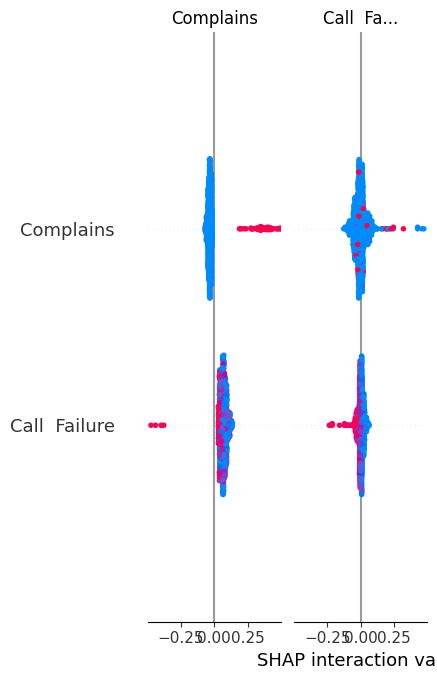

In [ ]:
shap.summary_plot(shap_values, X_test)

The summary plot shows the feature importance of each feature in the model.

The results show that `“Status,” “Complaints,” and “Frequency of use”` play major roles in determining the results.

In [ ]:
print(X_test.columns)

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'FN', 'FP'],
      dtype='object')


In [ ]:
print(shap_values.shape)
print(X_test.shape)

(945, 15, 2)
(945, 15)


### shap.dependence_plot("Subscription  Length", shap_values[1], X_test,interaction_index="Age")



we should eliminate the additional axis in shaoe_values if we are not going to se the `AssertionError: 'shap_values' and 'features' values must have the same number of rows!`

In [ ]:
shap_values = shap_values[:, :, 0]

A dependence plot is a type of scatter plot that displays how a model's predictions are affected by a specific feature (Subscription Length).

On average, subscription lengths have a mostly positive effect on the model.

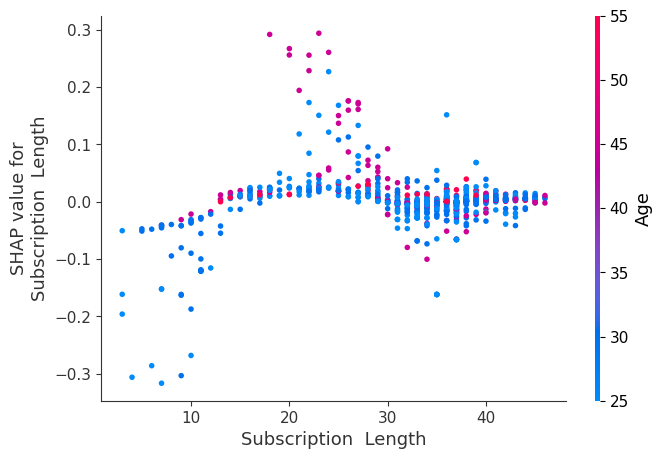

In [ ]:
shap.dependence_plot(2, shap_values, X_test, interaction_index="Age")
# It displays a summary graph of the relative importance of each feature and a dependency plot for the age category.

Key observations:

1. Axes:
  * X-axis: Subscription Length (ranging from approximately 0 to 45 units)
  * Y-axis: SHAP value for Subscription Length (ranging from about -0.3 to 0.3)
  * Color scale: Age (ranging from approximately 25 to 55 years)

2. Pattern Analysis:
  * There's a clear non-linear relationship between Subscription Length and its SHAP values
  * The relationship appears to have distinct phases:
    * Initial negative impact (0-10 subscription length)
    * Rising positive impact (10-20 subscription length)
    * Peak impact around 20-25 subscription length
    * Gradual decline and stabilization after 30

3. Age Interaction:
  * The color variation shows how age interacts with subscription length
  * Higher ages (pink/magenta points) tend to appear more frequently in the middle range of subscription lengths
  * Younger ages (blue points) are more dispersed across the subscription length range
  * There appears to be some clustering of older customers in regions with higher SHAP values


4. Insights:

  * The model suggests that subscription length has its strongest positive impact on predictions around the 20-25 month mark
  * The relationship becomes more stable (closer to zero SHAP value) for longer subscription periods
  * Age appears to be an important interaction factor, particularly in the middle range of subscription lengths
  * Very short subscription lengths (<10) tend to have a negative impact on the model's predictions

This visualization suggests that both subscription length and customer age are important features in your model, with complex interaction effects between them. The impact of subscription length on model predictions is not simply linear but varies significantly based on both the length itself and the customer's age.

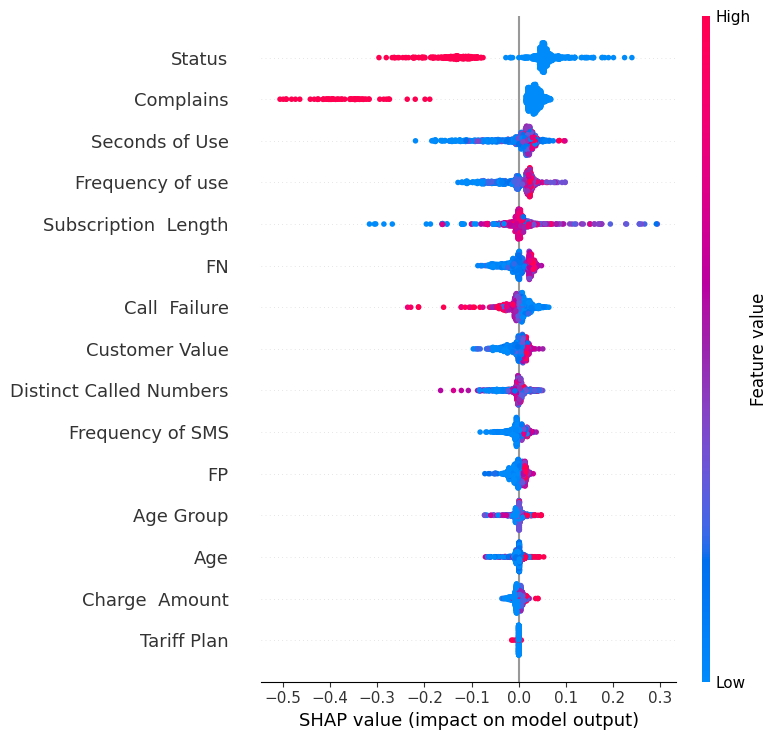

In [ ]:
shap.summary_plot(shap_values, X_test)

If you look at the feature **“Complaints '**, you will see that it is mostly high with a negative SHAP value. It means higher complaint counts tend to negatively affect the output.

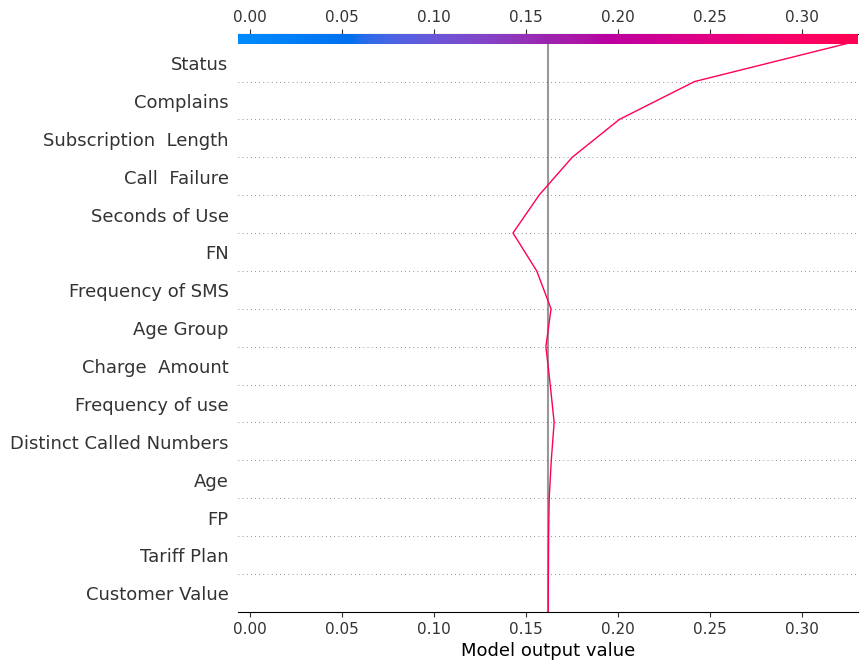

In [ ]:
shap.decision_plot(explainer.expected_value[1], shap_values[1], X_test.columns)

https://medium.com/@kundu.deepanjan/a-practical-guide-for-identifying-important-features-using-python-5448f7f99edd

https://github.com/shap/shap?tab=readme-ov-file

https://summer-hu-92978.medium.com/complete-shap-tutorial-for-model-explanation-part-5-python-example-4dfb2d688557


### Third Example **Predict Boston Housing price**

In [ ]:
shap.initjs()

In [ ]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

In [ ]:
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [ ]:
raw_df.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')

In [ ]:
data.shape, target.shape

((506, 13), (506,))

In [ ]:
# X = pd.DataFrame(boston.data, columns=boston.feature_names)
# y = boston.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=22)

In [ ]:
model = XGBRegressor(n_estimators=100)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = model.predict(X_test)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-Squared:', metrics.r2_score(y_test, y_pred))

RMSE: 3.3909577360179455
R-Squared: 0.8629371616528406


In [ ]:
# Reduce the size of data from original training data to estimate Shape values
X_train_summary = shap.kmeans(X_train, 10)

### 1. SHAP Force Plot

From force plot, for any given model instance(or observation), we can analyse:

a. Why the instance’s prediction is different from model average prediction

b. How much each feature contribute to the difference.

In [ ]:
tree_explainer = shap.TreeExplainer(model)
shap_values = tree_explainer.shap_values(X_test)

In [ ]:
shap.force_plot(tree_explainer.expected_value, shap_values[10,:], X_test.iloc[0,:])

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [ ]:
X_test.dtype

dtype('float64')

### Additional Notes

If X_test is actually a NumPy array and not a DataFrame, you will need to convert it to a DataFrame first or access it using standard NumPy indexing:


In [ ]:
# If X_test is a NumPy array
shap.force_plot(tree_explainer.expected_value, shap_values[10, :], X_test[10, :])

when we run the above code we will face the error of :

`Visualization omitted, Javascript library not loaded!
Have you run `initjs()` in this notebook? If this notebook was from another user you must also trust this notebook (File -> Trust notebook). If you are viewing this notebook on github the Javascript has been stripped for security. If you are using JupyterLab this error is because a JupyterLab extension has not yet been written.`

to solve the problem we use the trick below


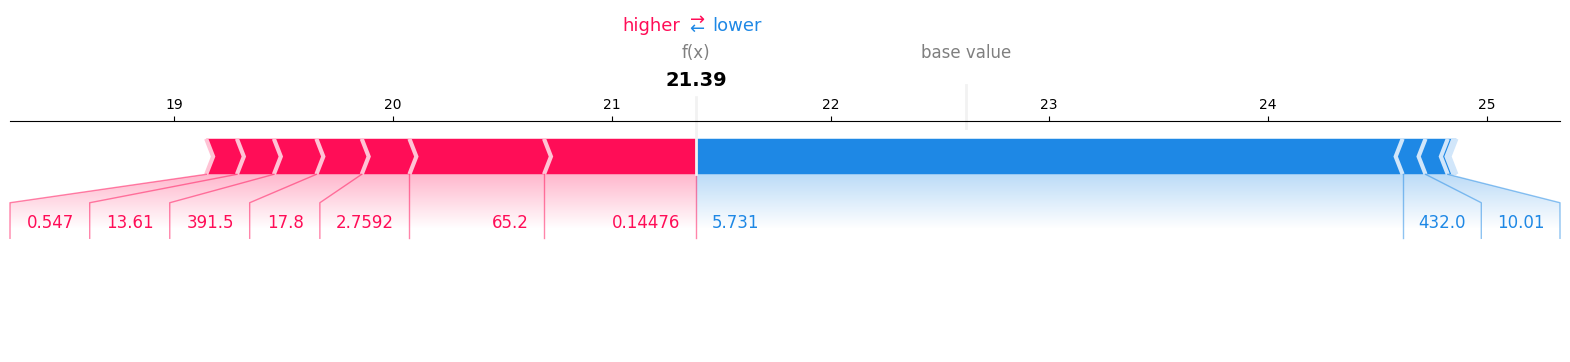

In [ ]:
shap.force_plot(tree_explainer.expected_value, shap_values[10, :], X_test[10, :], matplotlib=True)
# In the provided code snippet, the line that specifies the 10th instance is

The above example targets on 10th instance in dataset X, and chooses using TreeExplainer to calculate the instance’s feature contributions.

The base value is average prediction of all instances from dataset X , f(x) is the current instance prediction.

The X_test.iloc[0,:] part is actually selecting the first instance from the test set (X_test).

This means that while you are plotting the SHAP values for the 11th instance of your original dataset (X), you are using feature values from the first instance of your test set (X_test).


### 2. SHAP Summary Plot

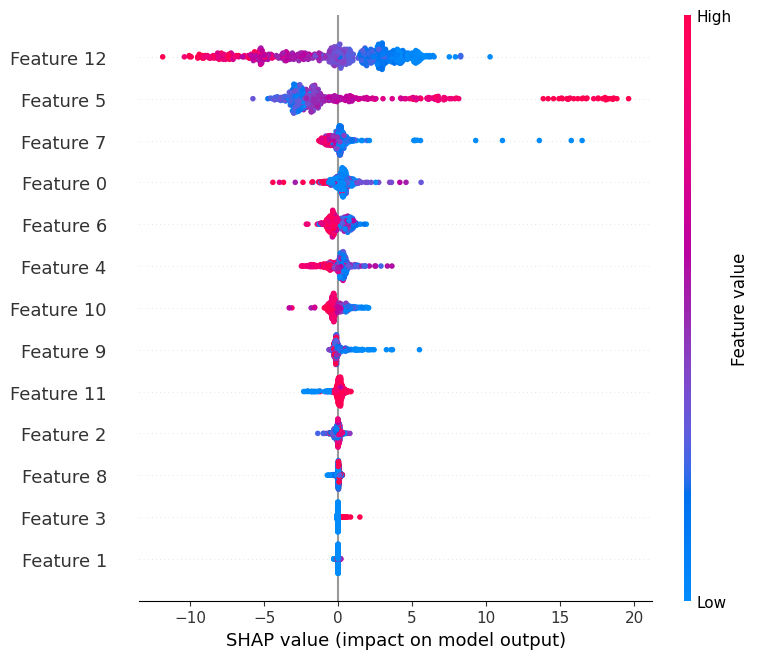

In [ ]:
tree_explainer = shap.TreeExplainer(model)
shap_values = tree_explainer.shap_values(data)
shap.summary_plot(shap_values, data)

raw_df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


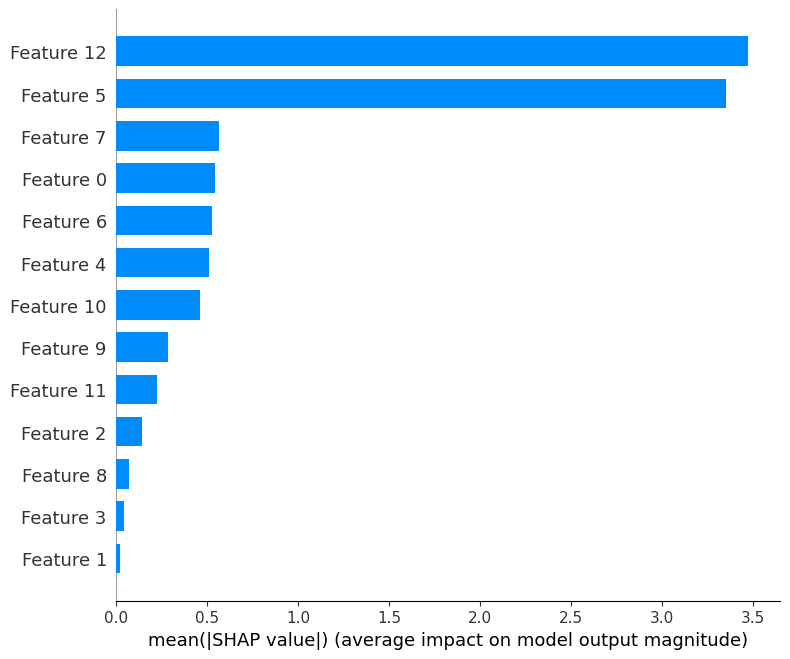

In [ ]:
shap.summary_plot(shap_values, data, plot_type="bar")

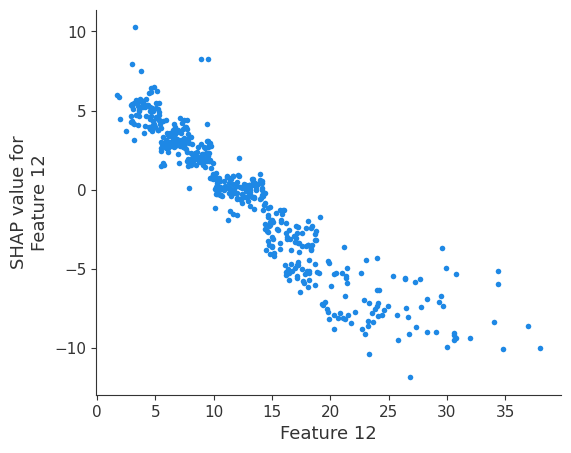

In [ ]:
shap.dependence_plot(12, shap_values, data, interaction_index=None)

### 7. Feature Selection and Feature Importance

https://medium.com/@dhanyahari07/feature-selection-using-xgboost-f0622fb70c4d

Feature selection is a crucial step in machine learning, especially when dealing with high-dimensional data.


### The following shows the ways to use XGBoost for feature selection:
1. Feature Importance Scores
  * XGBoost calculates three types of feature importance scores:

    * **Gain:** Average loss reduction gained when using a feature for splitting.
    * **Cover:** The number of times a feature is used to split data across trees weighted by training data points.
    * **Weight:** Total number of times a feature is used to split data across all trees.
    **********************************************
    * You can access these scores through the booster **.get_feature_importance()** method after training your XGBoost model.
    * These scores indicate the relative importance of features in contributing to the model’s predictions.
    * Higher score signifies greater importance.

2. Thresholding Scores:
  * You can choose a threshold for the importance scores and select features exceeding that threshold.
  * This can be a simple yet effective way to identify the most impactful features.
  * Scikit-learn’s SelectFromModel class can be used to apply this threshold-based selection directly.


  

In [8]:
# https://github.com/plotly/datasets/blob/master/diabetes.csv
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/refs/heads/master/diabetes.csv')

In [9]:
df.shape

(768, 9)

In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### Interpretation of Correlations:
1. A correlation close to 1 indicates a strong positive linear relationship.
2. A correlation close to -1 indicates a strong negative linear relationship.
3. A correlation close to 0 indicates little to no linear relationship.

* Pregnancies and Blood Pressure: - Correlation: 0.141282 - Weak positive relationship
* Pregnancies and Age: - Correlation: 0.544341 - Strong positive relationship
* Pregnancies and Skin Thickness: - Correlation: -0.081672 - Weak negative relationship

Insights:
* There's a strong positive correlation between pregnancies and age (0.544341), suggesting that older women tend to have more pregnancies.
* The correlation between pregnancies and outcome is moderate (0.221898), indicating that having more pregnancies is associated with a higher likelihood of developing diabetes.
* Most correlations with pregnancies are relatively weak, except for age, suggesting that pregnancies alone don't strongly determine other factors in the dataset.


<Axes: >

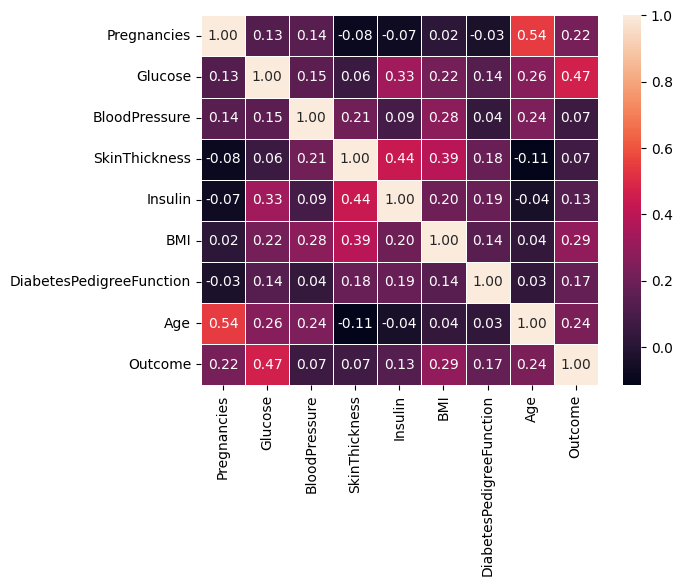

In [13]:
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=.5)

<ipython-input-14-e89889d9676e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome',data=df,palette=['green','red'])


<Axes: xlabel='Outcome', ylabel='count'>

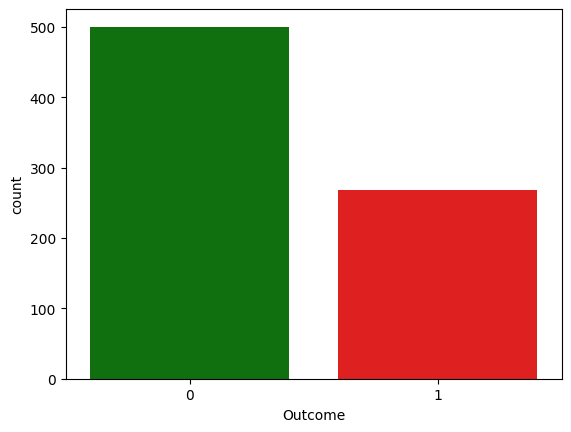

In [ ]:
sns.countplot(x='Outcome',data=df,palette=['green','red'])

<ipython-input-15-7e9f441f18f6>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Pregnancies'])


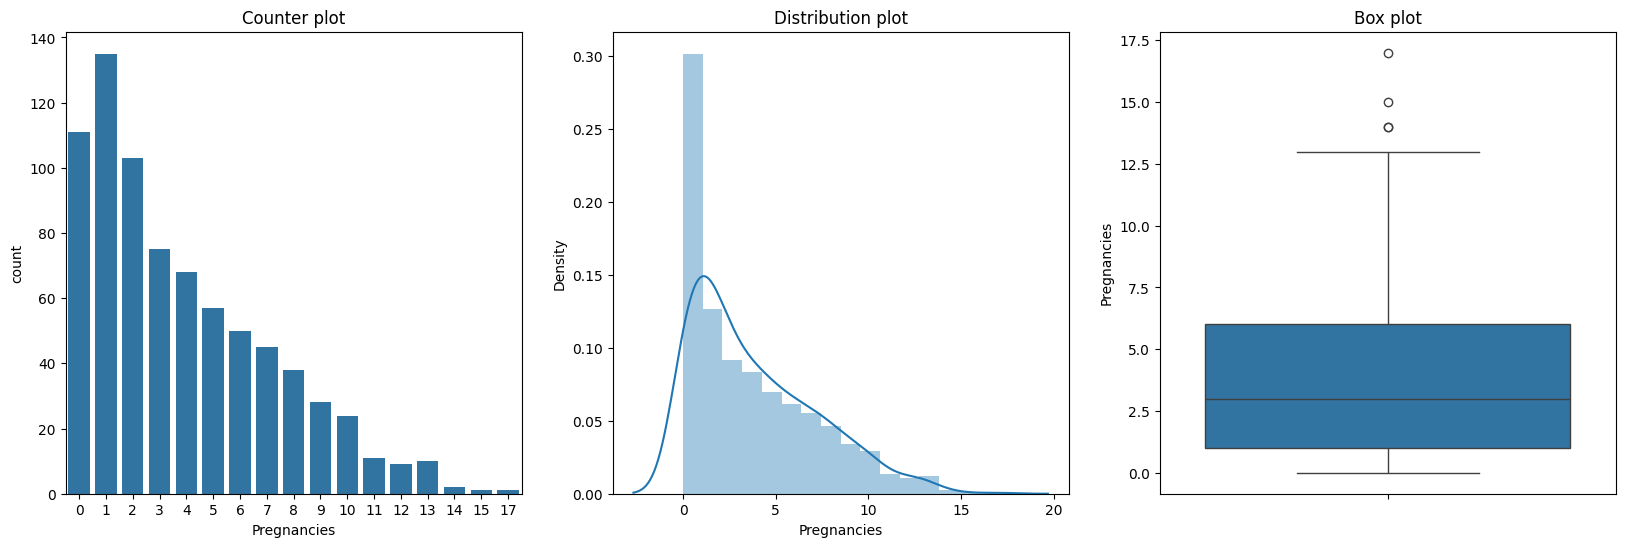

In [ ]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.title('Counter plot')
sns.countplot(x = 'Pregnancies',data=df)

plt.subplot(1,3,2)
plt.title('Distribution plot')
sns.distplot(df['Pregnancies'])

plt.subplot(1,3,3)
plt.title('Box plot')
sns.boxplot(y = df['Pregnancies'])
plt.show()

### Create Model

In [14]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

*italicized text*### Standard Scalar to scale the data

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Define XGBoost Classifier and fit the model

In [19]:
model = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1)
model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Calculate the accuracy of the model

In [20]:
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7403


The accuracy of the model with this settings is 74.03%.

### 2. Now we will do the second part of analysis, where we will do feature importance using XGBoost and do the classification.

### Sort the feature importance

* **Sorting is the first step** in using individual feature importances as thresholds for feature selection with XGBoost!
* **Sorting the model.feature_importances_ array** ensures you iterate through them in **descending order of importance**.

In [22]:
thresholds = sort(model.feature_importances_)
thresholds

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([0.07470369, 0.08146232, 0.09283039, 0.09319206, 0.09957612,
       0.13794483, 0.14118701, 0.2791036 ], dtype=float32)

1. **Sorted Feature Importances:** Each value in this array represents how important each feature is in predicting the target variable.
2. **Descending Order:** The largest values at the beginning indicate features that are most important for the model's predictions.
3. **Range:** The values range from about 0.0747 (least important) to 0.2791 (most important).


The next step is, for each feature combination run the model and find the accuracy.

1. Looping through thresholds:

  * for thresh in thresholds: iterates through each sorted feature importance value, using it as a threshold for feature selection.

2. Feature selection:

  * **selection = SelectFromModel(model, threshold=thresh, prefit=True)** creates a feature selector based on the pre-trained model and the current threshold.
  * **select_X_train = selection.transform(X_train_scaled)** applies the selector to the training data, keeping only features with importance above the threshold.

3. Model training:

  * selection_model = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1) creates a new XGBoost classifier.
  * selection_model.fit(select_X_train, y_train) trains the model using the selected features from the training set.

4. Evaluation:
  * select_X_test = selection.transform(X_test_scaled) applies the same feature selection to the test data.
  * predictions = selection_model.predict(select_X_test) makes predictions on the test set using the trained model.
  * accuracy = accuracy_score(y_test, predictions) calculates the accuracy of the predictions.
  * print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0)) prints the threshold, number of selected features, and accuracy for each iteration.

In [24]:
for thresh in thresholds:
 # select features using threshold
 selection = SelectFromModel(model, threshold=thresh, prefit=True)
 select_X_train = selection.transform(X_train_scaled)
 # train model
 selection_model = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1)
 selection_model.fit(select_X_train, y_train)
 # eval model
 select_X_test = selection.transform(X_test_scaled)
 predictions = selection_model.predict(select_X_test)
 accuracy = accuracy_score(y_test, predictions)
 print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.075, n=8, Accuracy: 74.03%
Thresh=0.081, n=7, Accuracy: 72.08%
Thresh=0.093, n=6, Accuracy: 72.08%
Thresh=0.093, n=5, Accuracy: 72.73%
Thresh=0.100, n=4, Accuracy: 74.03%
Thresh=0.138, n=3, Accuracy: 71.43%
Thresh=0.141, n=2, Accuracy: 74.68%
Thresh=0.279, n=1, Accuracy: 73.38%


This loop allows you to see
*  how the model performs as you progressively remove less important features.
* You'll get a series of output lines showing the performance for different thresholds, allowing you to observe how the model's accuracy changes as fewer features are used.

The above figure displays the accuracy of the model with the number of features.
1. You can observe that, if we consider all the features we will be getting the same accuracy as the previous model without feature selection.
2. Again the case where n=2, we are getting a slightly improved accuracy than n=8.
3. This can be concluded as even with lesser number of features there is a scope of improving accuracy.
4. Threshold Sensitivity: Small changes in threshold values lead to significant changes in the number of selected features and model performance.


Thresh=0.075, n=8, Accuracy: 74.03%
* This was the starting point, using all features.
* 8 features were selected.
* The model achieved 74.03% accuracy.
